# Intro to Matplotlib

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

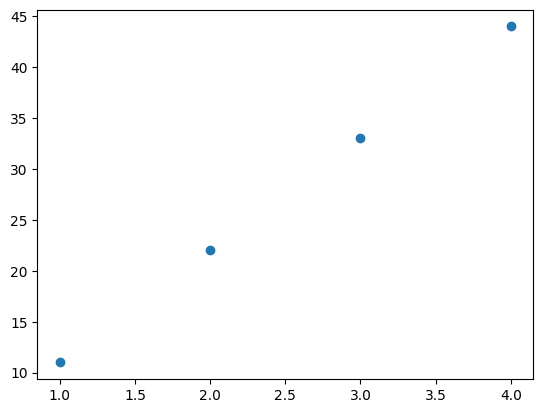

In [2]:
fig, ax = plt.subplots()
x = [1, 2, 3, 4]
y = [11, 22, 33, 44]
#ax.plot(x, y)
ax.scatter(x, y)
plt.show()

## Making figures with NumPy arrays

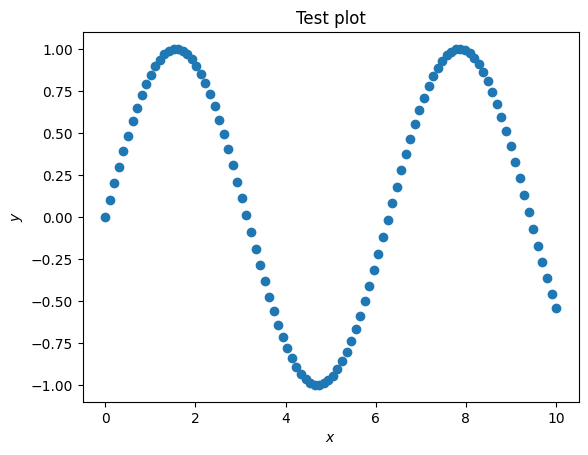

In [3]:
x = np.linspace(0, 10, 100)
y = np.sin(x)
fig, ax = plt.subplots()
#ax.plot(x, y)
ax.scatter(x,y)
ax.set(title="Test plot",
       xlabel=r"$x$",
       ylabel=r"$y$")

plt.show()

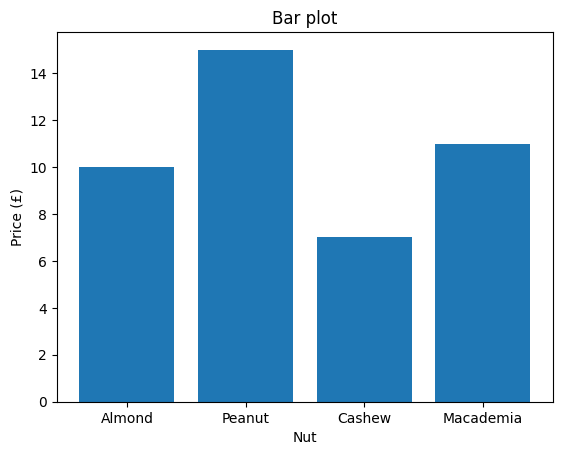

In [4]:
nut_prices = {"Almond": 10,
              "Peanut": 15,
              "Cashew": 7, 
              "Macademia": 11}

fig, ax = plt.subplots()
#ax.plot(x, y)
ax.bar(nut_prices.keys(), nut_prices.values())
ax.set(title="Bar plot",
       xlabel="Nut",
       ylabel="Price (£)")

plt.show()

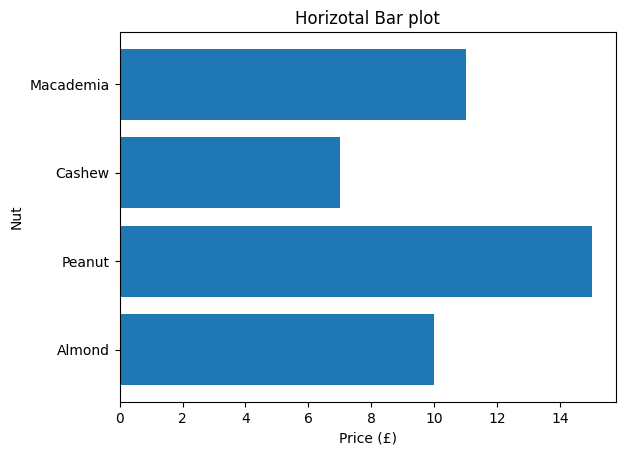

In [5]:
fig, ax = plt.subplots()
#ax.plot(x, y)
ax.barh(list(nut_prices.keys()), nut_prices.values())
ax.set(title="Horizotal Bar plot",
       ylabel="Nut",
       xlabel="Price (£)")

plt.show()

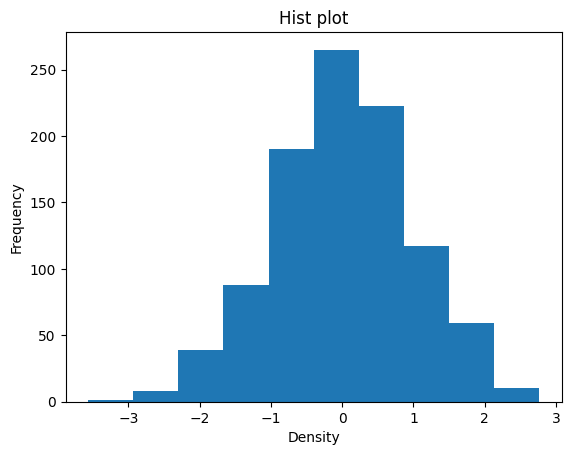

In [6]:
np.random.seed(1234)

z = np.random.randn(1000)
fig, ax = plt.subplots()
#ax.plot(x, y)
#ax.barh(list(nut_prices.keys()), nut_prices.values())
ax.hist(z)
ax.set(title="Hist plot",
       ylabel="Frequency",
       xlabel="Density")

plt.show()

In [7]:
# plot from pandas data frame

car_sales = pd.read_csv('car-sales.csv')
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


In [8]:
car_sales["Price"] = car_sales["Price"].replace("[$,]", "", regex=True).astype(float)
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,4000.0
1,Honda,Red,87899,4,5000.0
2,Toyota,Blue,32549,3,7000.0
3,BMW,Black,11179,5,22000.0
4,Nissan,White,213095,4,3500.0
5,Toyota,Green,99213,4,4500.0
6,Honda,Blue,45698,4,7500.0
7,Honda,Blue,54738,4,7000.0
8,Toyota,White,60000,4,6250.0
9,Nissan,White,31600,4,9700.0


In [9]:
# Create random dates
sale_dates = []
dt = np.datetime64('2023-01-01')
days_in_year = np.arange(0, 365, step=1)
np.random.seed(1234)
for i in range(0, len(car_sales)):
    sale_dates.append( dt + np.random.choice(days_in_year))
print(sale_dates)
    
car_sales["Sales date"] = sale_dates#pd.date_range("1/1/2023", periods=len(car_sales))
car_sales = car_sales.sort_values(by="Sales date")
car_sales

[numpy.datetime64('2023-10-31'), numpy.datetime64('2023-07-31'), numpy.datetime64('2023-10-22'), numpy.datetime64('2023-02-23'), numpy.datetime64('2023-07-24'), numpy.datetime64('2023-06-02'), numpy.datetime64('2023-05-24'), numpy.datetime64('2023-06-27'), numpy.datetime64('2023-10-07'), numpy.datetime64('2023-08-22')]


,Make,Colour,Odometer (KM),Doors,Price,Sales date
3,BMW,Black,11179,5,22000.0,2023-02-23
6,Honda,Blue,45698,4,7500.0,2023-05-24
5,Toyota,Green,99213,4,4500.0,2023-06-02
7,Honda,Blue,54738,4,7000.0,2023-06-27
4,Nissan,White,213095,4,3500.0,2023-07-24
1,Honda,Red,87899,4,5000.0,2023-07-31
9,Nissan,White,31600,4,9700.0,2023-08-22
8,Toyota,White,60000,4,6250.0,2023-10-07
2,Toyota,Blue,32549,3,7000.0,2023-10-22
0,Toyota,White,150043,4,4000.0,2023-10-31


In [10]:
car_sales["Total sales"] = car_sales["Price"].cumsum()

car_sales

,Make,Colour,Odometer (KM),Doors,Price,Sales date,Total sales
3,BMW,Black,11179,5,22000.0,2023-02-23,22000.0
6,Honda,Blue,45698,4,7500.0,2023-05-24,29500.0
5,Toyota,Green,99213,4,4500.0,2023-06-02,34000.0
7,Honda,Blue,54738,4,7000.0,2023-06-27,41000.0
4,Nissan,White,213095,4,3500.0,2023-07-24,44500.0
1,Honda,Red,87899,4,5000.0,2023-07-31,49500.0
9,Nissan,White,31600,4,9700.0,2023-08-22,59200.0
8,Toyota,White,60000,4,6250.0,2023-10-07,65450.0
2,Toyota,Blue,32549,3,7000.0,2023-10-22,72450.0
0,Toyota,White,150043,4,4000.0,2023-10-31,76450.0


<Axes: xlabel='Sales date'>

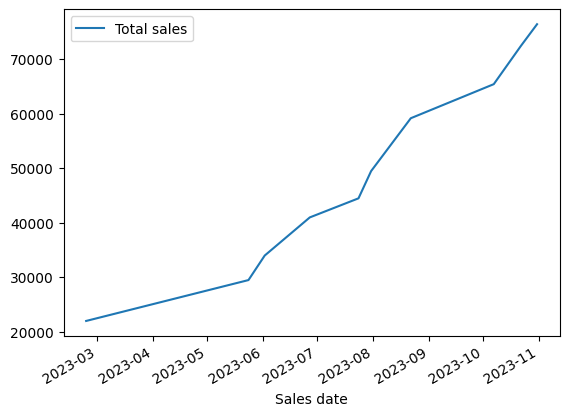

In [11]:
car_sales.plot(x="Sales date", y="Total sales")

<Axes: xlabel='Odometer (KM)', ylabel='Price'>

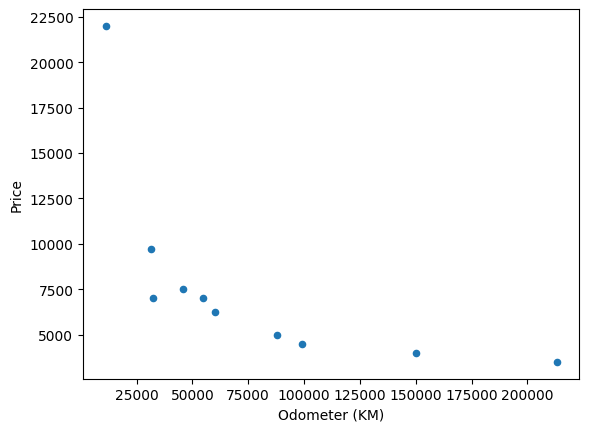

In [12]:

car_sales.plot(x="Odometer (KM)", y="Price", kind="scatter")

<Axes: xlabel='Colour'>

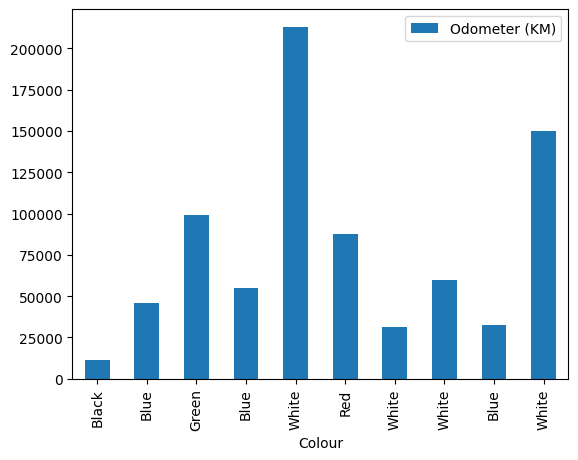

In [13]:
car_sales.plot(x="Colour", y="Odometer (KM)", kind="bar", stacked=True)

<Axes: xlabel='Colour'>

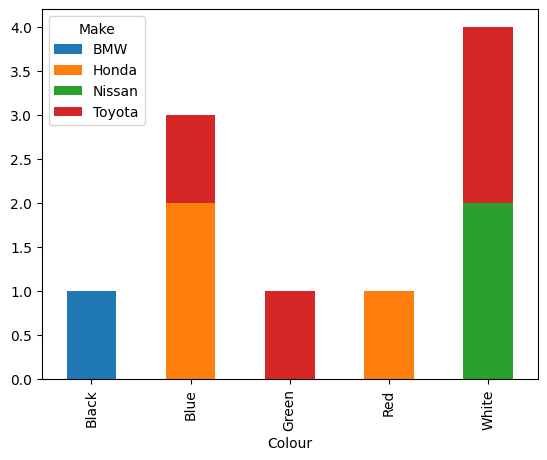

In [14]:
summary = pd.crosstab(index=car_sales["Colour"], columns=[car_sales["Make"]])
summary.plot(kind="bar", stacked=True)

In [15]:
heart_disease = pd.read_csv("heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


<Axes: ylabel='Density'>

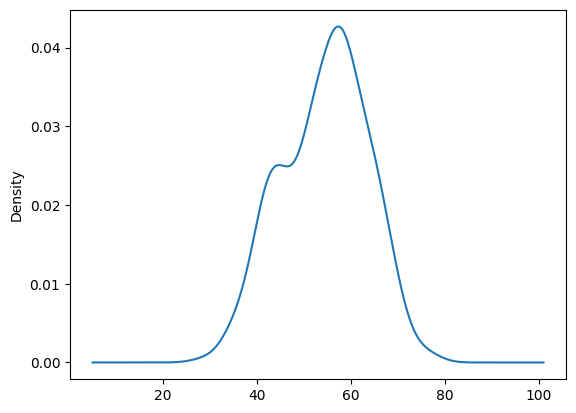

In [23]:
heart_disease["age"].plot(kind="kde")

array([<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
       <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
       <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
       <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
       <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
       <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
       <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
      dtype=object)

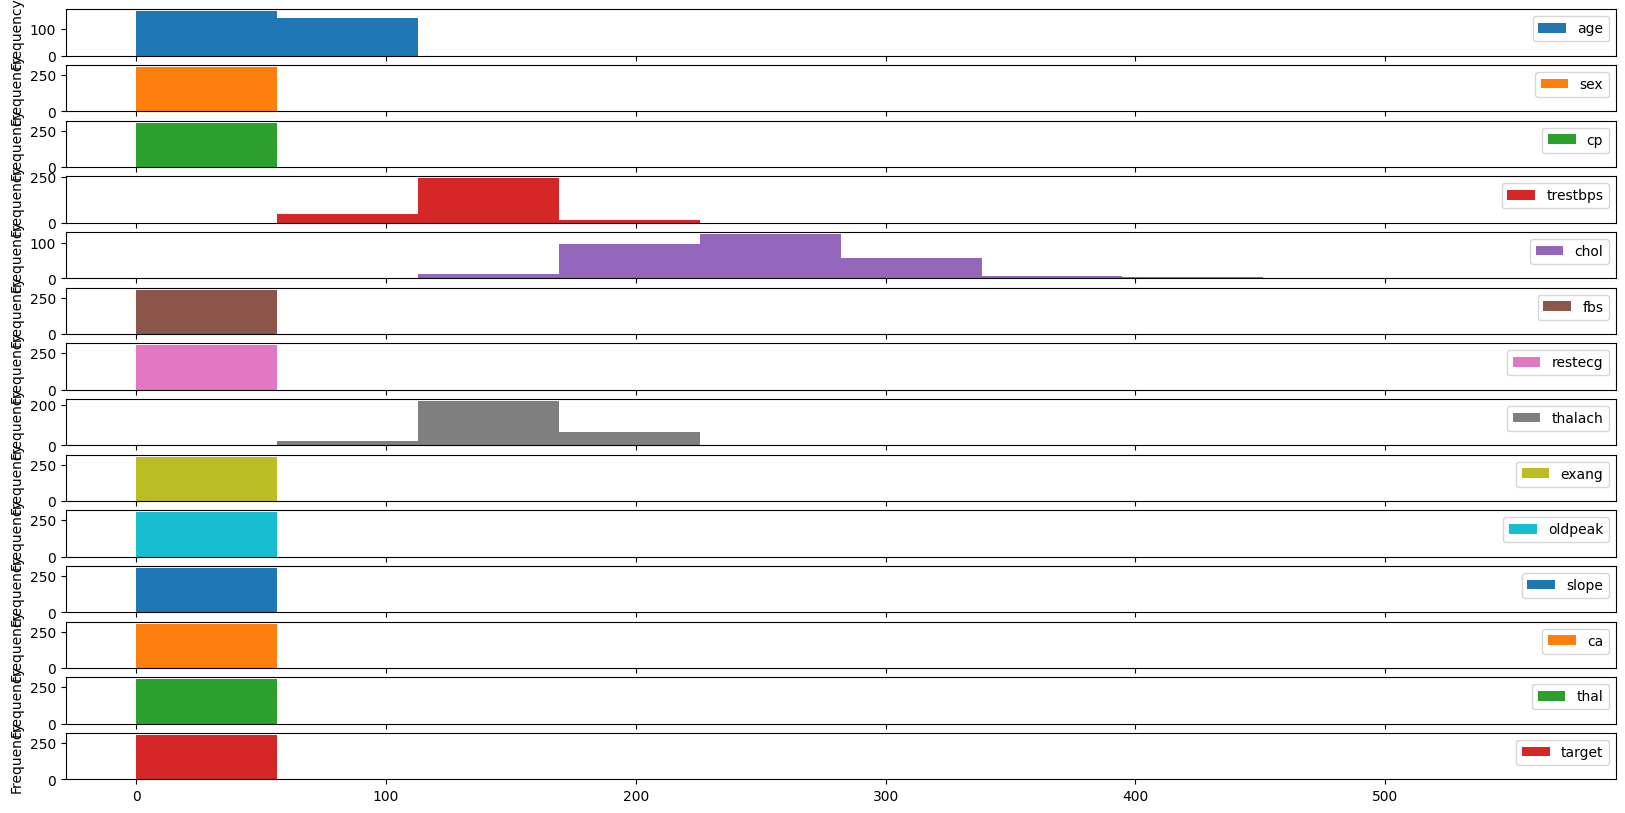

In [22]:
heart_disease.plot(kind="hist", subplots=True, figsize=(20,10))

In [24]:
over_50 = heart_disease[heart_disease["age"] > 50]
over_50

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,59,1,0,164,176,1,0,90,0,1.0,1,2,1,0
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


<Axes: xlabel='age', ylabel='chol'>

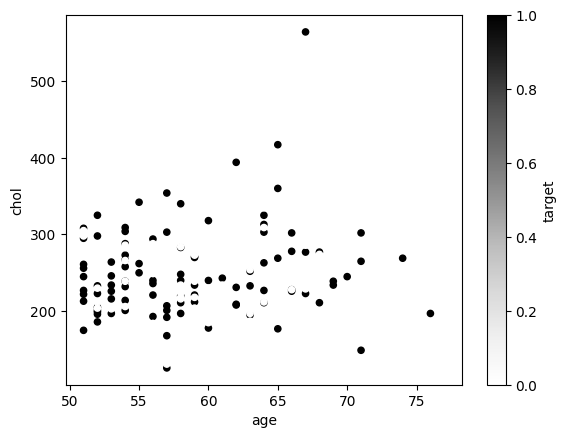

In [26]:
over_50.plot(kind="scatter", x="age", y="chol", c="target")

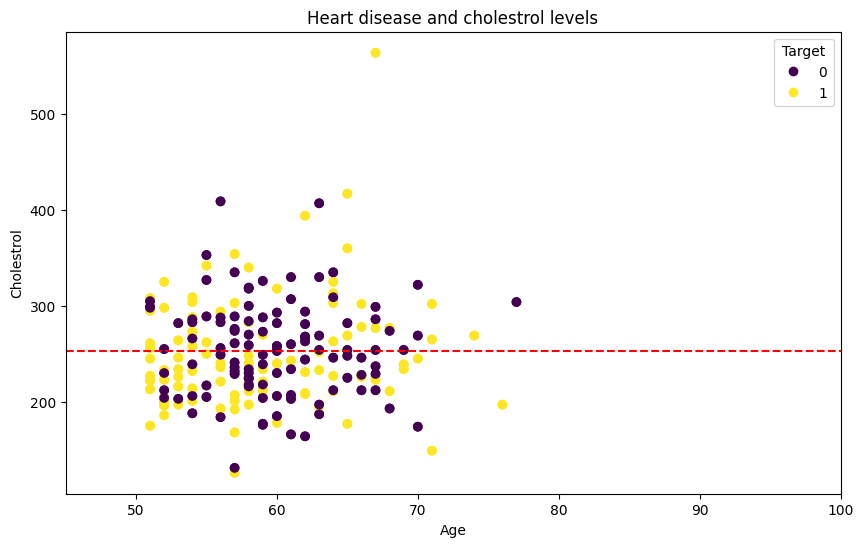

In [47]:
import matplotlib.collections 

labels = [0,1]
fig, ax = plt.subplots(figsize=(10,6))
scatter = ax.scatter(x=over_50["age"], y=over_50["chol"], c=over_50["target"])
ax.scatter(x=over_50["age"], y=over_50["chol"], c=over_50["target"])
#handles, _ = scatter.legend_elements(prop="colors", alpha=0.6)
#legend1 = ax.legend(handles, labels, loc="upper right")
#ax.add_artist(legend1)
# Add horizontal line
ax.axhline(over_50["chol"].mean(), c='red', linestyle="--")
# Add legend based on target category
ax.legend(*scatter.legend_elements(), title="Target")
ax.set_title("Heart disease and cholestrol levels")
ax.set_xlabel("Age")
ax.set_ylabel("Cholestrol")
ax.set_xlim(xmin=45, xmax=100)
plt.show()